In [53]:
# Import required libraries
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole  # For molecule visualization in Jupyter
from rdkit import RDLogger
from rdkit.Chem import AllChem as Chem  # RDKit's main chemistry toolkit
from rdkit.Chem import Descriptors as rdescriptors  # For molecular descriptors
from rdkit.Chem import Descriptors, Lipinski, Crippen

# Configure RDKit logging
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)  # Set logging level to CRITICAL to minimize output

# Load molecular structures from SDF file
Chem.SDMolSupplier('../data/drugbank.sdf')

In [4]:
cubane = Chem.MolFromSmiles("C12C3C4C1C5C2C3C45")

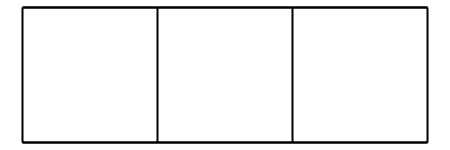

In [6]:
cubane

In [8]:
len(Chem.GetSSSR(cubane))

5

In [10]:
drugbank = [mol for mol in Chem.SDMolSupplier('../data/drugbank.sdf') if mol]

In [12]:
# Calculate the number of rings in each molecule using Smallest Set of Smallest Rings (SSSR)
rings = [len(Chem.GetSSSR(mol)) for mol in drugbank]
# Calculate molecular descriptors for each molecule in the drugbank dataset
# mws = [rdescriptors.CalcMolDescriptors(mol) for mol in drugbank]

In [55]:
def lipinski_rule_of_five(suppl):
    lipinski_passed = []

    for mol in suppl:
        if mol:  # Ensure molecule is valid
            rules = [
                Lipinski.NumHAcceptors(mol) <= 10,
                Lipinski.NumHDonors(mol) <= 5,
                Descriptors.MolWt(mol) < 500,
                Crippen.MolLogP(mol) <= 5
            ]
            if sum(rules) >= 3:  # At least 3 out of 4 rules must be satisfied
                lipinski_passed.append(mol)

    return lipinski_passed  # Return the list of molecules that pass the rule

In [103]:
import os

base_path = '/Users/artemfadeev/Code/CDD'
# Expand the tilde (~) to the full home directory path
file_path = os.path.expanduser(f"{base_path}/cdd2025/data/drugbank.sdf")

# Load the SDF file
suppl = Chem.SDMolSupplier(file_path)

In [105]:
filtered_molecules = lipinski_rule_of_five(suppl)
print(f"{len(filtered_molecules)} molecules passed Lipinski's Rule of Five")

6379 molecules passed Lipinski's Rule of Five
